## original biplot arrow variance scale

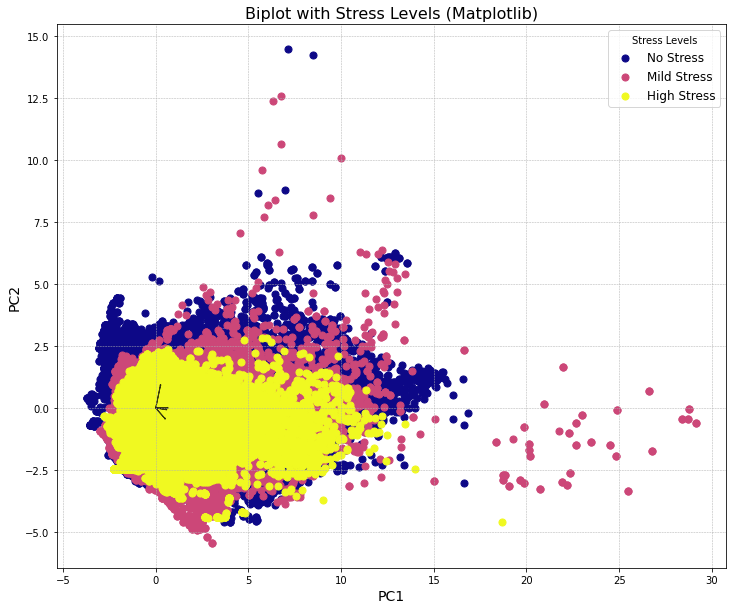

In [15]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

source_directory = "/Users//Desktop/Final Files 04-06-24/final-hexo-04-06-24/modified files"

# Use glob to get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(source_directory, '*.csv'))

# Create a dictionary to store dataframes
dataframes = {}

# Load all CSV files into the dictionary
for file in csv_files:
    file_name = os.path.splitext(os.path.basename(file))[0]
    dataframes[file_name] = pd.read_csv(file)

# Concatenate all DataFrames into one
big_dataframe = pd.concat(dataframes.values(), ignore_index=True)

# Drop the columns
columns_to_drop = [col for col in big_dataframe.columns if 'Time' in col or 'Stress' in col or 'Adjusted' in col]
original_dataframe = big_dataframe.drop(columns=columns_to_drop)

# Duplicate the DataFrame
working_dataframe = original_dataframe.copy()

# Check if 'Stress Levels' column exists in the original DataFrame
if 'Stress Levels' in big_dataframe.columns:
    # Perform Standard Scaling
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(working_dataframe)

    # Perform PCA
    pca = PCA(n_components=2)  # Set the number of components to 2 for plotting
    pca.fit(scaled_data)

    # Transform the data onto the first two principal components
    components_data = pca.transform(scaled_data)

    # Plot using Matplotlib
    plt.figure(figsize=(12, 10))

    # Define custom labels for the legend
    legend_labels = {0: 'No Stress', 1: 'Mild Stress', 2: 'High Stress'}

    # Plot points with 'Stress Levels' color scheme
    stress_levels = big_dataframe['Stress Levels'].unique()
    colors = plt.cm.plasma(np.linspace(0, 1, len(stress_levels)))
    for i, stress_level in enumerate(stress_levels):
        indices = big_dataframe['Stress Levels'] == stress_level
        plt.scatter(components_data[indices, 0], components_data[indices, 1], label=legend_labels[stress_level], color=colors[i], s=50)

    # Add biplot arrows for principal component loadings
    features = working_dataframe.columns
    pca_components = pca.components_.T
    for i, (x, y) in enumerate(pca_components):
        plt.arrow(0, 0, x, y, color='k', alpha=0.75, linewidth=1, head_width=0.05, head_length=0.05)
#         plt.text(x * 1.1, y * 1.1, features[i], color='k', ha='center', va='center', fontsize=12)

    plt.title('Biplot with Stress Levels (Matplotlib)', fontsize=16)
    plt.xlabel('PC1', fontsize=14)
    plt.ylabel('PC2', fontsize=14)
    plt.legend(title='Stress Levels', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

else:
    print("No 'Stress Levels' column found in the original DataFrame.")


## experimenting with plot style
## put labels on arrows
## two charts with explained variance (prinicpal components)

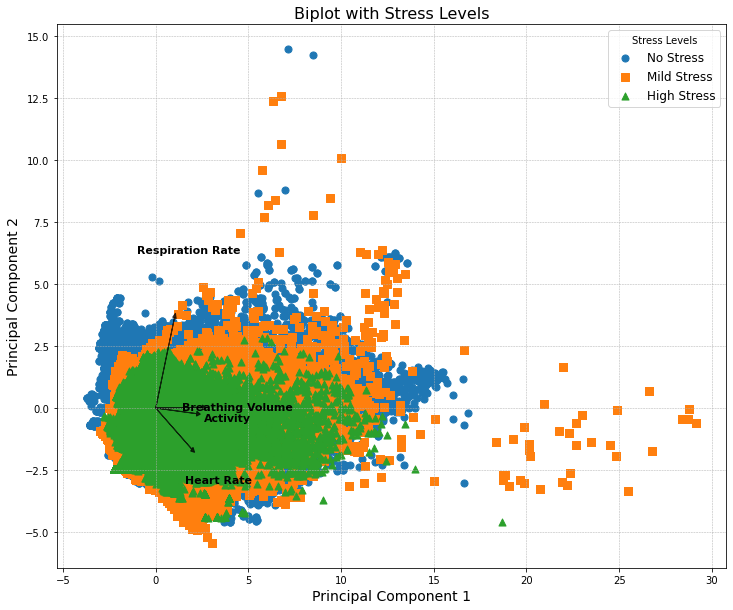

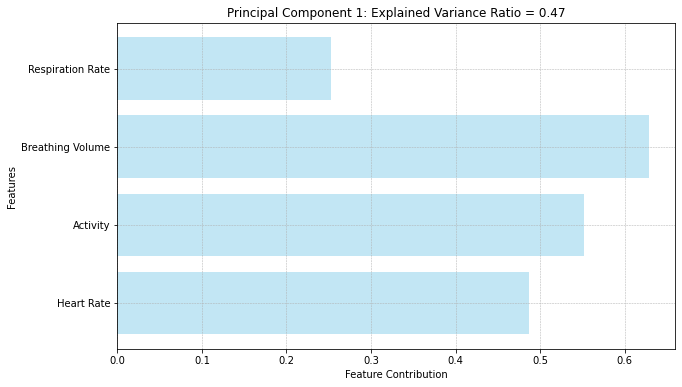

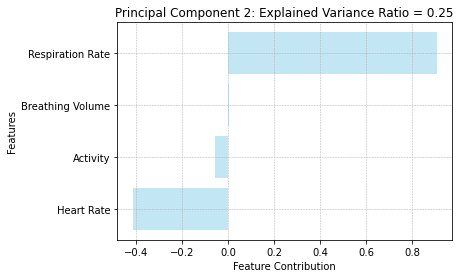

In [38]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

source_directory = "/Users//Desktop/Final Files 04-06-24/final-hexo-04-06-24/modified files"

# Use glob to get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(source_directory, '*.csv'))

# Create a dictionary to store dataframes
dataframes = {}

# Load all CSV files into the dictionary
for file in csv_files:
    file_name = os.path.splitext(os.path.basename(file))[0]
    dataframes[file_name] = pd.read_csv(file)

# Concatenate all DataFrames into one
big_dataframe = pd.concat(dataframes.values(), ignore_index=True)

# Drop the columns
columns_to_drop = [col for col in big_dataframe.columns if 'Time' in col or 'Stress' in col or 'Adjusted' in col]
original_dataframe = big_dataframe.drop(columns=columns_to_drop)

# Duplicate the DataFrame
working_dataframe = original_dataframe.copy()

# Check if 'Stress Levels' column exists in the original DataFrame
if 'Stress Levels' in big_dataframe.columns:
    # Perform Standard Scaling
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(working_dataframe)

    # Perform PCA
    pca = PCA(n_components=2)  # Set the number of components to 2 for plotting
    pca.fit(scaled_data)

    # Transform the data onto the first two principal components
    components_data = pca.transform(scaled_data)

    # Plot using Matplotlib
    plt.figure(figsize=(12, 10))

    # Define custom labels for the legend
    legend_labels = {0: 'No Stress', 1: 'Mild Stress', 2: 'High Stress'}

    # Define custom labels for the features
    custom_feature_labels = {
        'Respiration Rate (rpm)': 'Respiration Rate',
        'Breathing Volume (liters/min)': 'Breathing Volume',
        'Activity (g)': 'Activity',
        'Heart Rate (bpm)': 'Heart Rate'
        
        # Add more custom labels as needed
    }

    # Define markers for each stress score
    markers = ['o', 's', '^']

    # Plot points with 'Stress Levels' color scheme
    stress_levels = big_dataframe['Stress Levels'].unique()
    for i, stress_level in enumerate(stress_levels):
        indices = big_dataframe['Stress Levels'] == stress_level
        plt.scatter(components_data[indices, 0], components_data[indices, 1], label=legend_labels[stress_level], cmap='viridis', marker=markers[i], s=50)

    # Add biplot arrows for principal component loadings
    features = working_dataframe.columns
    pca_components = pca.components_.T
    for i, (x, y) in enumerate(pca_components):
        plt.arrow(0, 0, x*4, y*4, color='k', alpha=0.75, linewidth=1, head_width=0.2, head_length=0.2)
        plt.text(x * 7, y * 7, custom_feature_labels[features[i]], color='k', ha='center', va='center', fontsize=11, weight='bold')

    plt.title('Biplot with Stress Levels', fontsize=16)
    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.legend(title='Stress Levels', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

    # Create a separate graph for feature contributions and explained variance
    plt.figure(figsize=(10, 6))
    for i, var_ratio in enumerate(pca.explained_variance_ratio_):
        plt.barh(y=range(len(features)), width=pca.components_[i], color='skyblue', alpha=0.5)
        plt.xlabel('Feature Contribution')
        plt.ylabel('Features')
        plt.title(f'Principal Component {i+1}: Explained Variance Ratio = {var_ratio:.2f}')
        plt.yticks(range(len(features)), [custom_feature_labels[feat] for feat in features])
        plt.gca().invert_yaxis()  # Invert y-axis to match the biplot
        plt.grid(True, linestyle='--', linewidth=0.5)
        plt.show()

else:
    print("No 'Stress Levels' column found in the original DataFrame.")


## final biplot desinged (enlarged length of variance arrows)

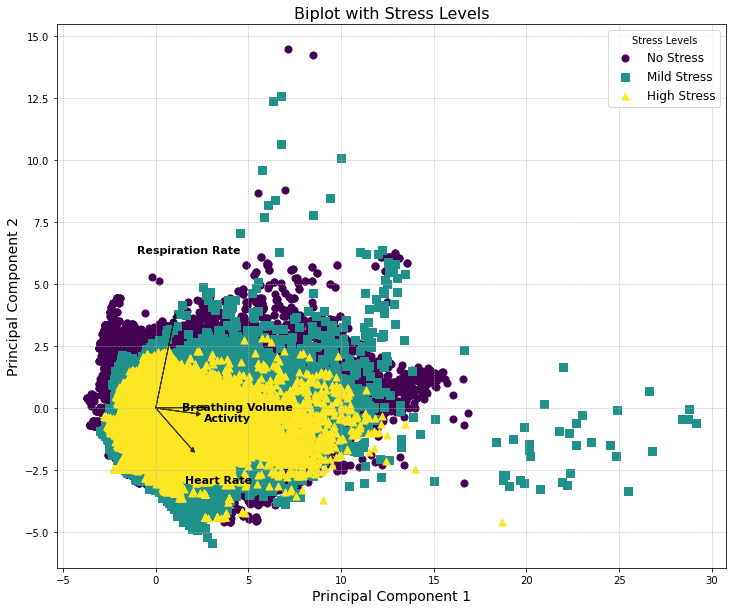

In [39]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

source_directory = "/Users//Desktop/Final Files 04-06-24/final-hexo-04-06-24/modified files"

# Use glob to get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(source_directory, '*.csv'))

# Create a dictionary to store dataframes
dataframes = {}

# Load all CSV files into the dictionary
for file in csv_files:
    file_name = os.path.splitext(os.path.basename(file))[0]
    dataframes[file_name] = pd.read_csv(file)

# Concatenate all DataFrames into one
big_dataframe = pd.concat(dataframes.values(), ignore_index=True)

# Drop the columns
columns_to_drop = [col for col in big_dataframe.columns if 'Time' in col or 'Stress' in col or 'Adjusted' in col]
original_dataframe = big_dataframe.drop(columns=columns_to_drop)

# Duplicate the DataFrame
working_dataframe = original_dataframe.copy()

# Check if 'Stress Levels' column exists in the original DataFrame
if 'Stress Levels' in big_dataframe.columns:
    # Perform Standard Scaling
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(working_dataframe)

    # Perform PCA
    pca = PCA(n_components=2)  # Set the number of components to 2 for plotting
    pca.fit(scaled_data)

    # Transform the data onto the first two principal components
    components_data = pca.transform(scaled_data)

    # Plot using Matplotlib
    plt.figure(figsize=(12, 10))

    # Define custom labels for the legend
    legend_labels = {0: 'No Stress', 1: 'Mild Stress', 2: 'High Stress'}

    # Define custom labels for the features
    custom_feature_labels = {
        'Respiration Rate (rpm)': 'Respiration Rate',
        'Breathing Volume (liters/min)': 'Breathing Volume',
        'Activity (g)': 'Activity',
        'Heart Rate (bpm)': 'Heart Rate'
        
        # Add more custom labels as needed
    }

    # Define markers for each stress score
    markers = ['o', 's', '^']

    # Define colormap
    colors = plt.cm.viridis(np.linspace(0, 1, len(legend_labels)))

    # Plot points with 'Stress Levels' color scheme
    stress_levels = big_dataframe['Stress Levels'].unique()
    for i, stress_level in enumerate(stress_levels):
        indices = big_dataframe['Stress Levels'] == stress_level
        plt.scatter(components_data[indices, 0], components_data[indices, 1], label=legend_labels[stress_level], color=colors[i], marker=markers[i], s=50)

    # Add biplot arrows for principal component loadings
    features = working_dataframe.columns
    pca_components = pca.components_.T
    for i, (x, y) in enumerate(pca_components):
        plt.arrow(0, 0, x*4, y*4, color='k', alpha=0.75, linewidth=1, head_width=0.2, head_length=0.2)
        plt.text(x * 7, y * 7, custom_feature_labels[features[i]], color='k', ha='center', va='center', fontsize=11, weight='bold')

    plt.title('Biplot with Stress Levels', fontsize=16)
    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.legend(title='Stress Levels', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

else:
    print("No 'Stress Levels' column found in the original DataFrame.")
